[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal distributiion')]

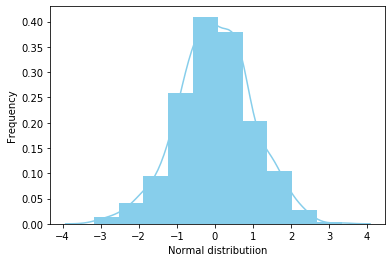

In [3]:
#Distribusi Normal

#memanggil pustaka
import matplotlib.pyplot as pl
import seaborn as sns
from scipy.stats import norm

data_normal = norm.rvs(size=1000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                bins=10,kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Normal distributiion', ylabel='Frequency')

In [32]:
import pandas as pd

data_cov = pd.read_csv("/home/not/Downloads/Covid-19_province.csv")
data_cov[-5:]

,Type,Features Type,ID-number,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Features Geometry Type,Features Geometry Coordinates
29,FeatureCollection,Feature,30,76,Sulawesi Barat,1036,841,14,Point,"119.34347138300006,-2.461902014999964"
30,FeatureCollection,Feature,31,81,Maluku,3863,3266,47,Point,"129.360425,-3.126119342999971"
31,FeatureCollection,Feature,32,82,Maluku Utara,2232,1946,75,Point,"128.01592944200002,0.869337001000019"
32,FeatureCollection,Feature,33,94,Papua,9037,4637,129,Point,"140.0000000000001,-5"
33,FeatureCollection,Feature,34,91,Papua Barat,4189,3655,66,Point,"132.9683417120001,-2.041723281999964"


In [40]:
#data_cov = data_cov.drop(columns=['Type','Features Type','ID-number'])
data_cov[:5]

,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Features Geometry Type,Features Geometry Coordinates
0,11,Aceh,7797,6258,282,Point,"96.90952274800009,4.225081892000048"
1,12,Sumatera Utara,13277,10846,542,Point,"99.05788784900005,2.184779215000049"
2,13,Sumatera Barat,16709,13386,311,Point,"100.46680503000005,-0.85191434799998"
3,14,Riau,14841,11490,340,Point,"101.81289195400007,0.510525849000032"
4,15,Jambi,1399,892,27,Point,"103.59932,-1.61775"


In [16]:
import numpy as np

conf_case = np.array(data_cov['Confirmed_cases'])
reco_case = np.array(data_cov['Recovered_cases'])
prov_name = np.array(data_cov['Province_name'])

print(conf_case[:5]) 
print(reco_case[:5])
print(prov_name[:5])

[ 7797 13277 16709 14841  1399]
[ 6258 10846 13386 11490   892]
['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi']


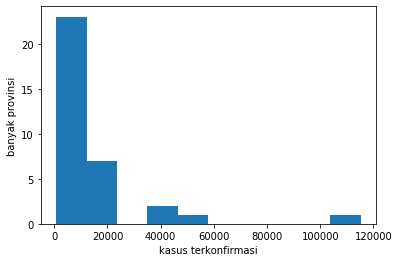

In [51]:
dir_python = "/home/not/Project/Python/Gambar/"

conf_fig = pl.figure()
conf_vis = pl.hist(conf_case)
pl.ylabel("banyak provinsi")
pl.xlabel("kasus terkonfirmasi")
pl.show()
conf_fig.savefig(dir_python+'conf_cases.png')

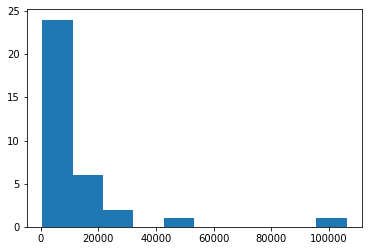

In [49]:
reco_fig = pl.figure()
reco_vis = pl.hist(reco_case)
pl.show()
reco_fig.savefig('reco_cases.png')

<function matplotlib.pyplot.show(*args, **kw)>

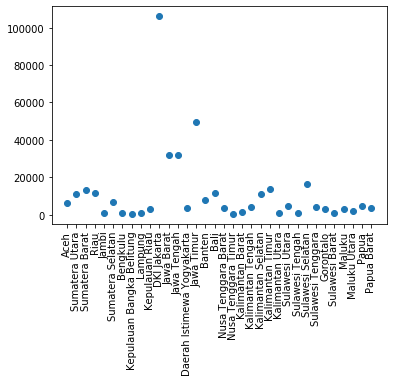

In [27]:
cov_fig = pl.figure()
pl.scatter(prov_name,reco_case)
pl.xticks(rotation=90)
pl.show
cov_fig.savefig('covid_per_provinsi.png')

In [28]:
parameter_covid = np.array(data_cov[['Confirmed_cases',
                                     'Recovered_cases',
                                     'Death_cases']])

parameter_covid[:5]

array([[ 7797,  6258,   282],
       [13277, 10846,   542],
       [16709, 13386,   311],
       [14841, 11490,   340],
       [ 1399,   892,    27]])

In [35]:
from email.MIMEMultipart import MIMEMultipart
from email.MIMEText import MIMEText
from email.MIMEImage import MIMEImage

# Define these once; use them twice!
strFrom = 'from@example.com'
strTo = 'to@example.com'

# Create the root message and fill in the from, to, and subject headers
msgRoot = MIMEMultipart('related')
msgRoot['Subject'] = 'test message'
msgRoot['From'] = strFrom
msgRoot['To'] = strTo
msgRoot.preamble = 'This is a multi-part message in MIME format.'

# Encapsulate the plain and HTML versions of the message body in an
# 'alternative' part, so message agents can decide which they want to display.
msgAlternative = MIMEMultipart('alternative')
msgRoot.attach(msgAlternative)

msgText = MIMEText('This is the alternative plain text message.')
msgAlternative.attach(msgText)

# We reference the image in the IMG SRC attribute by the ID we give it below
msgText = MIMEText('<b>Some <i>HTML</i> text</b> and an image.<br><img src="cid:image1"><br>Nifty!', 'html')
msgAlternative.attach(msgText)

# This example assumes the image is in the current directory
fp = open('test.jpg', 'rb')
msgImage = MIMEImage(fp.read())
fp.close()

# Define the image's ID as referenced above
msgImage.add_header('Content-ID', '<image1>')
msgRoot.attach(msgImage)

# Send the email (this example assumes SMTP authentication is required)
import smtplib
smtp = smtplib.SMTP()
smtp.connect('smtp.example.com')
smtp.login('exampleuser', 'examplepass')
smtp.sendmail(strFrom, strTo, msgRoot.as_string())
smtp.quit()

ini garis \ baru
